In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv', encoding='utf-8-sig', index_col=0)

df_dropna = df.dropna()

# 수도권 : 서울, 인천, 세종, 경기 -> 2
# 수도권 외 광역시: 부산, 대구, 광주, 대전, 울산 -> 1
# 그 외 지방: 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주 -> 0
print(df_dropna.describe())

print(df_dropna['region'].value_counts())
print(len(df_dropna['region'].value_counts()))

            region    education      jobtype       cptype        sales  \
count  1652.000000  1652.000000  1652.000000  1652.000000  1652.000000   
mean      0.789346     0.881356     0.498184     0.841404     1.079679   
std       0.830481     1.183560     0.500148     0.814930     2.748656   
min       0.000000     0.000000     0.000000     0.000000    -0.130200   
25%       0.000000     0.000000     0.000000     0.000000    -0.124500   
50%       1.000000     0.000000     0.000000     1.000000     0.000000   
75%       2.000000     2.000000     1.000000     2.000000     0.613500   
max       2.000000     4.000000     1.000000     2.000000    11.593808   

         employees   aversalary      capital  pros_encoded  
count  1652.000000  1652.000000  1652.000000   1652.000000  
mean      1.020606     0.254740     1.174385      0.357506  
std       2.296970     0.755275     3.064997      0.590889  
min      -0.208500    -1.782600    -0.113000     -0.500000  
25%      -0.151475    -0.173

튜닝된 xgboostClassifier 모델에서 피쳐 중요도 상위 3개 피쳐 ['pros_encoded', 'aversalary', 'capital'] 를 가지고 데이터 시각화

In [ ]:
numClusters = 3
regionColors = ['red', 'green', 'blue']
dataPointColor = [regionColors[row] for row in df_dropna['region']]

features = ['pros_encoded', 'aversalary', 'capital']

# math.comb(len(features),2)
fig, axes = plt.subplots(3, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)

tmp_idx = 0
for i in range(len(features)):
    for j in range(i+1, len(features)):
        ax = axes[tmp_idx]
        ax.scatter(df_dropna[features[i]], df_dropna[features[j]], c=dataPointColor, alpha=0.5)
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        tmp_idx += 1

plt.show()

## k-means clustering

the number of clusters is 3  

2D visualization with PCA

d:\anaconda3\envs\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


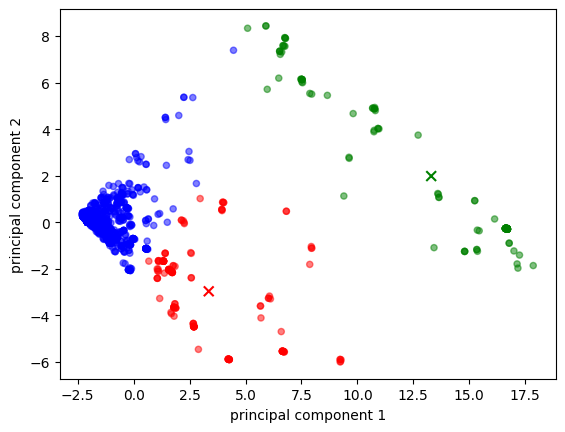

In [10]:
numClusters = 3
colors = ['red', 'green', 'blue']
X = df_dropna
kmeans = KMeans(n_clusters=numClusters).fit(X)

regions = X['region']
labels = kmeans.predict(X)
dataPointColor = [colors[row] for row in labels]

centroids = kmeans.cluster_centers_
centroidColor = [colors[item] for item in range(numClusters)]

# pca = PCA(n_components=3)
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    # 'p_component 3',
                                    ])
c_transformed = pca_fit.transform(centroids)

fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
        #    principalDf['p_component 3'],
           c=dataPointColor,
           s=20,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
# ax.set_zlabel('principal component 3')

plt.scatter(c_transformed[:, 0], 
            c_transformed[:, 1], 
            # c_transformed[:, 2],
            c=centroidColor,
            s=50,
            marker='x',)

plt.show()

the number of clusters is 3  

3D visualization with PCA

d:\anaconda3\envs\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myvenv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


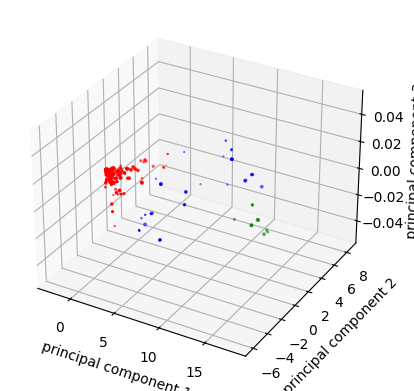

In [9]:
numClusters = 3
colors = ['red', 'green', 'blue', 'black', 'yellow']
X = df_dropna
kmeans = KMeans(n_clusters=numClusters).fit(X)

regions = X['region']
labels = kmeans.predict(X)
dataPointColor = [colors[row] for row in labels]

centroids = kmeans.cluster_centers_
centroidColor = [colors[item] for item in range(numClusters)]

pca = PCA(n_components=3)
# pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    'p_component 3',
                                    ])
c_transformed = pca_fit.transform(centroids)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
           principalDf['p_component 3'],
           c=dataPointColor,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

plt.scatter(c_transformed[:, 0], 
            c_transformed[:, 1], 
            c_transformed[:, 2],
            c=centroidColor,
            marker='x',)

plt.show()

## DBSCAN

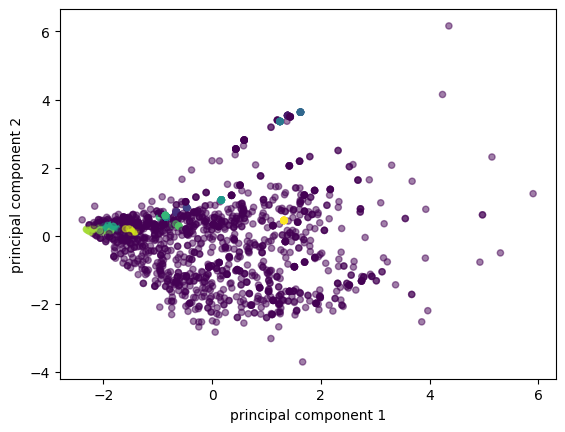

Number of clusters in labels:  16


In [ ]:
X = df_dropna
clustering = DBSCAN(eps=0.2, min_samples=10).fit(X)

regions = X['region']
labels = clustering.labels_

# pca = PCA(n_components=3)
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    # 'p_component 3',
                                    ])

fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(1,1,1)

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
        #    principalDf['p_component 3'],
        s=20,
           c=labels,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
# ax.set_zlabel('principal component 3')

plt.show()

print("Number of clusters in labels: ", len(set(clustering.labels_)))

d:\anaconda3\envs\myvenv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


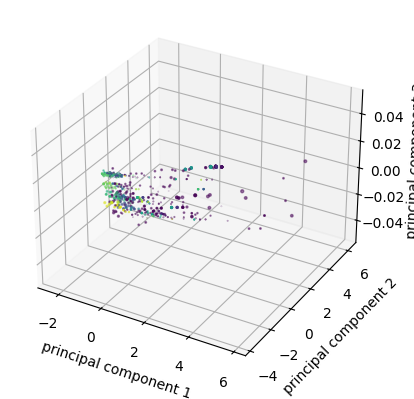

74


In [ ]:
X = df_dropna
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)

regions = X['region']
labels = clustering.labels_

pca = PCA(n_components=3)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['p_component 1', 
                                    'p_component 2', 
                                    'p_component 3',
                                    ])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(principalDf['p_component 1'], 
           principalDf['p_component 2'], 
           principalDf['p_component 3'],
           c=labels,
           alpha=0.5,
           )

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

plt.show()

print(len(set(clustering.labels_)))